In [4]:
import pandas as pd
from underthesea import word_tokenize 
import string
from gensim.utils import simple_preprocess
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from nltk.util import ngrams

In [5]:
df = pd.read_csv("data.csv",encoding='utf-8')

In [6]:
def read_file(file):
    with open(file, 'r', encoding='utf-8') as f:
        line = f.readlines()
        lines = list(m.replace("\n","") for m in line)
        # print(line)
    f.close()
    return lines

In [7]:
Content = read_file("ListContent.txt")
Content[0:2]

['mẫu đồng_hồ thông_minh galaxy gear samsung ảnh afp slashgear hôm tương_tác tv thông_minh galaxy gear đảm_nhiệm chức_năng kênh âm_lượng tắt tv galaxy gear khả_năng theo_dõi sức_khỏe tức_là thông_tin sức_khỏe của đeo thiết_bị phát tv nắm được sức_khỏe của được hiện galaxy gear có_thể làm_việc các thiết_bị di_động của samsung như galaxy note galaxy tab inch các thiết_bị như galaxy galaxy note sẽ có cập_nhật để tương_tác được với galaxy gear thành luân',
 'phó_tổng_thống mỹ công_du châu_bàn biển đông nhật ký thỏa_thuận quân_sự philippines thủ_tướng nhật shinzo abe dự_kiến hội_đàm hai lãnh_đạo tái cam_kết_thúc_đẩy hợp_tác song_phương tokyowashington kyodo abe sẽ trao_đổi với phó_tổng_thống mỹ về lập_trường của nhật bản tranh_chấp biển đông biển hoa đông chuyến công_du malaysia singapore và philippines của ông abe tăng_cường hợp_tác kinh_tế và an_ninh với các thành_viên của hiệp_hội các quốc_gia đông_nam asean diễn trong bối_cảnh yêu_sách chủ_quyền cứng_rắn của trung_quốc trên biển đông dấ

In [5]:
from collections import defaultdict
# nltk.download('stopwords')
import string
import nltk

word_counts = defaultdict(int)
for doc in Content:
    words = doc.translate(str.maketrans('','',string.punctuation)).lower().split()
    words = ['<s>'] + words
    for i in range(1,len(words)):
        prev_word = words[i-1]
        curr_word = words[i]
        word_counts[(prev_word,curr_word)] +=1

In [6]:
word_counts

defaultdict(int,
            {('<s>', 'mẫu'): 196,
             ('mẫu', 'đồnghồ'): 23,
             ('đồnghồ', 'thôngminh'): 57,
             ('thôngminh', 'galaxy'): 11,
             ('galaxy', 'gear'): 12,
             ('gear', 'samsung'): 3,
             ('samsung', 'ảnh'): 6,
             ('ảnh', 'afp'): 417,
             ('afp', 'slashgear'): 3,
             ('slashgear', 'hôm'): 2,
             ('hôm', 'tươngtác'): 1,
             ('tươngtác', 'tv'): 1,
             ('tv', 'thôngminh'): 4,
             ('gear', 'đảmnhiệm'): 1,
             ('đảmnhiệm', 'chứcnăng'): 10,
             ('chứcnăng', 'kênh'): 1,
             ('kênh', 'âmlượng'): 1,
             ('âmlượng', 'tắt'): 1,
             ('tắt', 'tv'): 3,
             ('tv', 'galaxy'): 1,
             ('gear', 'khảnăng'): 1,
             ('khảnăng', 'theodõi'): 15,
             ('theodõi', 'sứckhỏe'): 58,
             ('sứckhỏe', 'tứclà'): 1,
             ('tứclà', 'thôngtin'): 1,
             ('thôngtin', 'sứckhỏe'): 7,
     

In [7]:
total = sum(word_counts.values())
total

17201914

In [8]:
# Compute the probabilities of each n-gram using add-k smoothing
k = 1
n = 2
# Compute the probabilities of each n-gram using Laplace smoothing
probs_laplace = defaultdict(lambda: defaultdict(float))
probs = defaultdict(lambda: defaultdict(float))

update_keys = []
a = word_counts.copy()
for gram in a.keys():
    value = word_counts[gram]
    count = word_counts.get(gram, 0)
    context = gram[:-1]
    update_keys.append(gram)
    probs_laplace[gram] = (count + k) / (word_counts[context] + k*total)
for key in update_keys:
    probs[key] = probs_laplace[key]

In [9]:
def sinhchu(input,probs):
    next_word_probs = defaultdict(float)
    context = tuple(input_tokens[-1:])
    for gram, prob in probs.items():
        if gram[:-1] == context:
            next_word = gram[-1]
            next_word_probs[next_word] += prob  
    return max(next_word_probs, key=next_word_probs.get)

In [10]:

input_phrase = "hôm nay trời học"
input_tokens = word_tokenize(input_phrase)

for i in range(10):
    a = sinhchu(input_tokens,probs)
    input_tokens.append(a)
print(input_tokens)

['hôm nay', 'trời', 'học', 'lớp', 'trường', 'đạihọc', 'caođẳng', 'sưphạm', 'kỹthuật', 'và', 'các', 'trường', 'đạihọc']


In [11]:
output_phrase = " ".join([a for a in input_tokens])
output_phrase

'hôm nay trời học lớp trường đạihọc caođẳng sưphạm kỹthuật và các trường đạihọc'

# word2vec


In [1]:
def read_data(List_word):
    traindata = []
    for sent in List_word:
        traindata.append(sent.split())
    return traindata

In [8]:
train_data = read_data(Content)
train_data[:3]

[['mẫu',
  'đồng_hồ',
  'thông_minh',
  'galaxy',
  'gear',
  'samsung',
  'ảnh',
  'afp',
  'slashgear',
  'hôm',
  'tương_tác',
  'tv',
  'thông_minh',
  'galaxy',
  'gear',
  'đảm_nhiệm',
  'chức_năng',
  'kênh',
  'âm_lượng',
  'tắt',
  'tv',
  'galaxy',
  'gear',
  'khả_năng',
  'theo_dõi',
  'sức_khỏe',
  'tức_là',
  'thông_tin',
  'sức_khỏe',
  'của',
  'đeo',
  'thiết_bị',
  'phát',
  'tv',
  'nắm',
  'được',
  'sức_khỏe',
  'của',
  'được',
  'hiện',
  'galaxy',
  'gear',
  'có_thể',
  'làm_việc',
  'các',
  'thiết_bị',
  'di_động',
  'của',
  'samsung',
  'như',
  'galaxy',
  'note',
  'galaxy',
  'tab',
  'inch',
  'các',
  'thiết_bị',
  'như',
  'galaxy',
  'galaxy',
  'note',
  'sẽ',
  'có',
  'cập_nhật',
  'để',
  'tương_tác',
  'được',
  'với',
  'galaxy',
  'gear',
  'thành',
  'luân'],
 ['phó_tổng_thống',
  'mỹ',
  'công_du',
  'châu_bàn',
  'biển',
  'đông',
  'nhật',
  'ký',
  'thỏa_thuận',
  'quân_sự',
  'philippines',
  'thủ_tướng',
  'nhật',
  'shinzo',
  'abe',
 

In [9]:
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count()

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
from time import time
t = time()

w2v_model.build_vocab(train_data, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
t = time()

w2v_model.train(train_data, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [10]:
# w2v_model.save("word2vec_findSimilarity.model")
w2v_model = Word2Vec.load("word2vec_findSimilarity.model")

In [20]:
w2v_model.wv.most_similar(positive=["hoa"], topn = 1)

[('loa_kèn', 0.5164973139762878)]

In [12]:
w2v_model.wv.most_similar(positive=["hoa_nhài"])

[('bồ_công_anh', 0.5593549013137817),
 ('oải_hương', 0.5441020131111145),
 ('loa_kèn', 0.4902820587158203),
 ('cam_thảo', 0.4879370629787445),
 ('lá_dứa', 0.4825466275215149),
 ('thược_dược', 0.4822268784046173),
 ('thơm_ngát', 0.464323490858078),
 ('bông', 0.45708030462265015),
 ('vối', 0.4553004503250122),
 ('thoang_thoảng', 0.45199695229530334)]

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [14]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

C:\Users\Computer-_-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Computer-_-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


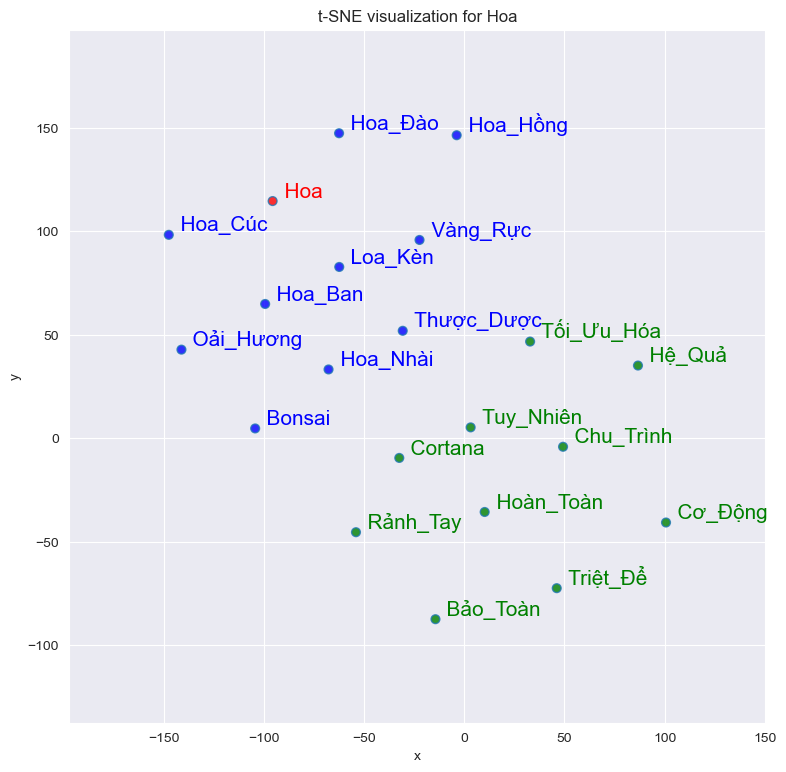

In [15]:
tsnescatterplot(w2v_model, 'hoa', [i[0] for i in w2v_model.wv.most_similar(negative=["hoa"])])

C:\Users\Computer-_-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Computer-_-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


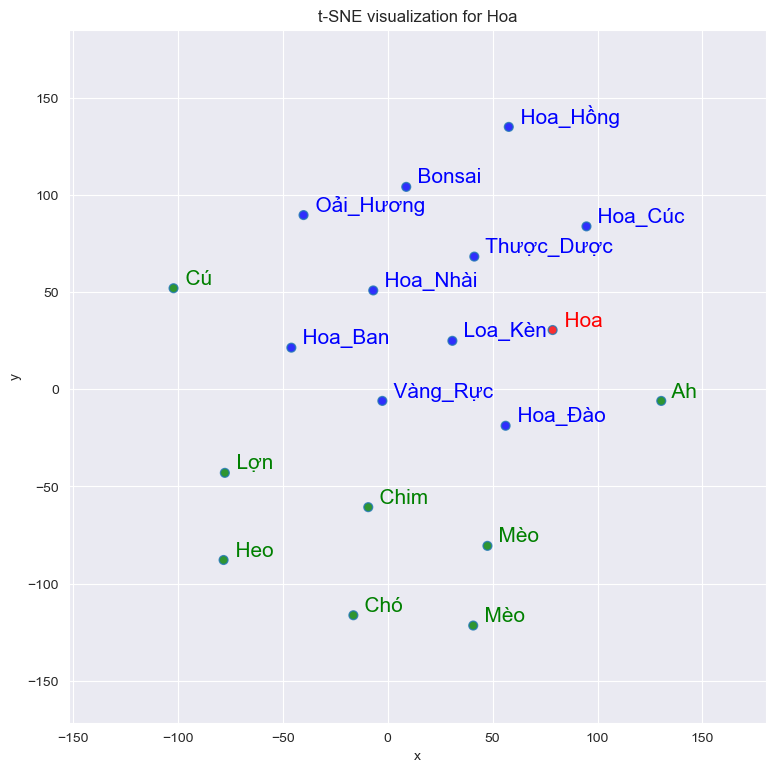

In [16]:
tsnescatterplot(w2v_model, 'hoa', ['chó', 'mèo', 'ah', 'heo', 'chim', 'lợn', 'cú', 'mèo'])

C:\Users\Computer-_-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Computer-_-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


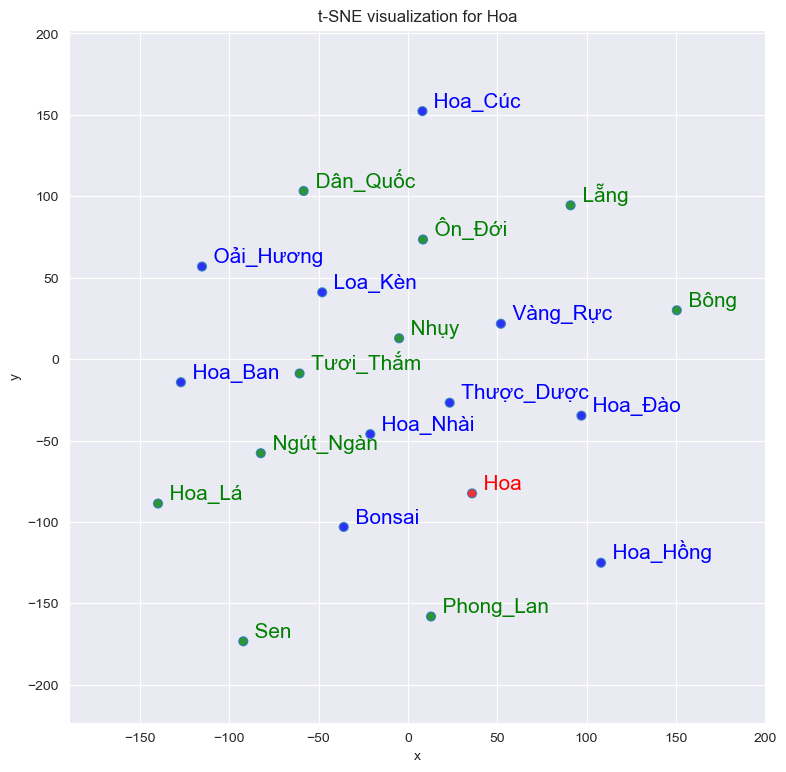

In [17]:
tsnescatterplot(w2v_model, "hoa", [t[0] for t in w2v_model.wv.most_similar(positive=["hoa"], topn=20)][10:])


# sinh chữ cho mô hình word2vec


In [33]:
word =  w2v_model.wv.most_similar(positive=["trời"], topn = 10)
word

[('tầm_tã', 0.5089263319969177),
 ('tạnh', 0.47897055745124817),
 ('mưa', 0.4683961868286133),
 ('mưa_phùn', 0.4592801630496979),
 ('trời_đất', 0.4389006197452545),
 ('tê_tái', 0.4198513925075531),
 ('nắng', 0.41751033067703247),
 ('hửng_nắng', 0.414004385471344),
 ('mưa_gió', 0.4106992483139038),
 ('se_lạnh', 0.40874364972114563)]

In [26]:
(word[1][0])

'hoa_đào'

In [41]:
input_tokens[-1]

'trời'

In [37]:
import random
def sinhchuWord2vec(input,model):
    words = input
    for i in range(len(input)):
        ramdomTop10Word = random.randint(0, 9)
        word = model.wv.most_similar(positive=[words[-1]], topn = 10)
        words.append(word[ramdomTop10Word][0])
    return words

In [57]:
from underthesea import word_tokenize
input_phrase = "hôm nay Mặt trời"
input_tokens = word_tokenize(input_phrase)
inputSentence = sinhchuWord2vec(input_tokens,w2v_model)
inputSentence

KeyError: "Key 'Mặt trời' not present"

In [58]:
input_phrase = "hôm nay có trời"
input_tokens = word_tokenize(input_phrase)
inputSentence = sinhchuWord2vec(input_tokens,w2v_model)
inputSentence

['hôm nay', 'có', 'trời', 'hửng_nắng', 'se_lạnh', 'hanh_khô']

# print sentence

In [55]:
def sentence(input):
    newSentence = []
    for i in input:
        i = i.replace("_"," ")
        newSentence.append(i)
    return " ".join(newSentence)

In [56]:
sentence(inputSentence)


'hôm nay có trời tê tái gió lùa mái hiên'

# phobert

In [1]:
pip install transformers -U 

  Using cached transformers-4.27.1-py3-none-any.whl (6.7 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.25.1
    Uninstalling transformers-4.25.1:
      Successfully uninstalled transformers-4.25.1
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Computer-_-\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from transformers import AutoModel, AutoTokenizer
import torch
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
# INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
sentence = 'Chúng_tôi là những nghiên_cứu_viên .'  

input_ids = torch.tensor([tokenizer.encode(sentence)])

with torch.no_grad():
    features = phobert(input_ids)  # Models outputs are now tuples


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
text = 'Hôm nay trời đẹp quá.'
encoded_text = tokenizer.encode(text)
input_ids = torch.tensor(encoded_text).unsqueeze(0)
outputs = phobert(input_ids)